In [1]:
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 MB 5.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis/features"

data_cleaning.py     __init__.py       __pycache__
dataset_versions.py  model_factory.py  train.py
feature_creation.py  preprocessing.py  transformation.py


In [4]:
import sys
import os

# file is run from the parent directory py model/baseline.py
sys.path.append('/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis')


from features.transformation import assemble_feature_set
import pandas as pd
import h2o; h2o.init()
from h2o.automl import H2OAutoML
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import (
    H2OGradientBoostingEstimator,
    H2OXGBoostEstimator,
    H2ORandomForestEstimator,
)
from rich.traceback import install; install()
from sklearn.model_selection import train_test_split
from features.dataset_versions import load_dataset_version

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.16" 2025-07-15; OpenJDK Runtime Environment (build 17.0.16+8-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 17.0.16+8-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.12/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpijyp0jy3
  JVM stdout: /tmp/tmpijyp0jy3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpijyp0jy3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_julo1k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.9 MB/s eta 0:00:00


In [1]:
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.53.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.
firebase-admin 6.9.0 requires

In [6]:
def prepare_data(raw_df, dataset_version: str):
    """
    Full end-to-end preprocessing with:
      - dataset version selection
      - feature engineering (inside load_dataset_version)
      - stratified train/valid/test split
      - class weighting for imbalance
    """

    df = load_dataset_version(raw_df, dataset_version)
    train_df, temp_df = train_test_split(
        df, stratify=df["stroke"], test_size=0.30, random_state=42
    )

    valid_df, test_df = train_test_split(
        temp_df, stratify=temp_df["stroke"], test_size=0.50, random_state=42
    )

    counts = train_df["stroke"].value_counts().to_dict()
    total = sum(counts.values())
    n_classes = len(counts)
    class_weights = {cls: total / (n_classes * count) for cls, count in counts.items()}

    for df_part in [train_df, valid_df, test_df]:
        df_part["weights"] = df_part["stroke"].map(class_weights)

    return train_df, valid_df, test_df, class_weights

In [7]:
import h2o
from h2o.automl import H2OAutoML
from codecarbon import EmissionsTracker

def train_models(train_df, valid_df, test_df, dataset_version):
    """
    Train H2O AutoML with MLflow + CodeCarbon tracking.
    Logs:
        - dataset version
        - AUCPR on test set
        - default precision/recall/F1 (class 1)
        - carbon emissions
    """

    # =====================================================
    # Start Carbon Tracker
    # =====================================================
    tracker = EmissionsTracker()
    tracker.start()

    # =====================================================
    # Start MLflow Run
    # =====================================================
    with mlflow.start_run(run_name=f"automl_{dataset_version}"):

        mlflow.log_param("dataset_version", dataset_version)
        mlflow.log_param("model_type", "H2OAutoML")

        # -------------------------
        # Initialize H2O cluster
        # -------------------------
        h2o.init()

        h2o_train = h2o.H2OFrame(train_df)
        h2o_valid = h2o.H2OFrame(valid_df)
        h2o_test  = h2o.H2OFrame(test_df)

        # Convert target to factor
        for f in [h2o_train, h2o_valid, h2o_test]:
            f["stroke"] = f["stroke"].asfactor()

        y = "stroke"
        x = [c for c in h2o_train.columns if c not in ["stroke", "weights"]]

        # =====================================================
        # Run AutoML
        # =====================================================
        aml = H2OAutoML(
            max_models=50,
            seed=1984,
            nfolds=0,                 # We use our own validation set
            stopping_metric="AUCPR",
            sort_metric="AUCPR",
            exclude_algos=["GLM", "StackedEnsemble", "DeepLearning"],
            balance_classes=False,
            max_runtime_secs=300,
        )

        aml.train(
            x=x,
            y=y,
            training_frame=h2o_train,
            validation_frame=h2o_valid,
            weights_column="weights",
        )

        leader = aml.leader

        # =====================================================
        # Evaluate on TEST set
        # =====================================================

        mlflow.h2o.log_model(aml.leader, artifact_path="automl_leader")
        # Log leader algorithm
        mlflow.log_param("leader_algo", aml.leader.algo)

        # Log leaderboard
        leaderboard_df = aml.leaderboard.as_data_frame()
        leaderboard_df.to_csv("leaderboard.csv", index=False)
        mlflow.log_artifact("leaderboard.csv")

        test_perf = leader.model_performance(h2o_test)
        aucpr = test_perf.aucpr()

        print("Test AUCPR:", aucpr)
        mlflow.log_metric("test_aucpr", aucpr)

        # =====================================================
        # DEFAULT THRESHOLD METRICS (0.5)
        # =====================================================
        thr_table = test_perf.thresholds_and_metric_scores().as_data_frame()

        # Find EXACT ROW where threshold = 0.5
        default_row = thr_table.iloc[(thr_table["threshold"] - 0.5).abs().argmin()]

        precision_default = float(default_row["precision"])
        recall_default = float(default_row["recall"])
        f1_default = float(default_row["f1"])

        mlflow.log_metric("precision_default", precision_default)
        mlflow.log_metric("recall_default", recall_default)
        mlflow.log_metric("f1_default", f1_default)

        print(
            f"Default threshold=0.5 → "
            f"Precision={precision_default:.3f}, "
            f"Recall={recall_default:.3f}, "
            f"F1={f1_default:.3f}"
        )

        # =====================================================
        # Carbon Emissions
        # =====================================================
        emissions_kg = tracker.stop()
        mlflow.log_metric("carbon_emissions_kg", emissions_kg)
        print(f"Carbon Emissions (kg CO₂): {emissions_kg:.6f}")

        return aml, h2o_train, h2o_valid, h2o_test

In [8]:
import mlflow
from codecarbon import EmissionsTracker


def fine_tune_best_model(
    aml,
    h2o_train, h2o_valid, h2o_test,
    metric="AUCPR",
    version_name="v1_clipped", precision_target=0.9):

    with mlflow.start_run(run_name=f"finetune_{version_name}"):

        # --------------------------------
        # Track carbon emissions
        # --------------------------------
        tracker = EmissionsTracker()
        tracker.start()

        # Log metadata
        mlflow.log_param("dataset_version", version_name)

        best_model = aml.leader
        algo = best_model.algo
        mlflow.log_param("leader_algo", algo)

        # ------------- Extract base params -------------
        exclude_keys = {
            "model_id","training_frame","validation_frame","nfolds",
            "response_column","ignored_columns","weights_column",
            "stopping_metric","stopping_rounds","stopping_tolerance",
            "max_runtime_secs","seed","categorical_encoding",
            "quiet_mode","backend","score_each_iteration"
        }

        params = {k: v["actual"] for k, v in best_model.params.items()
                  if v["actual"] is not None and k not in exclude_keys}

        mlflow.log_params({f"leader_{k}": v for k, v in params.items()})

        # ----- Build base estimator -----
        if algo == "gbm":
            base_est = H2OGradientBoostingEstimator()
        elif algo == "xgboost":
            base_est = H2OXGBoostEstimator()
        elif algo == "drf":
            base_est = H2ORandomForestEstimator()
        else:
            raise ValueError(f"Unsupported algorithm {algo}")

        # ----------------------------------------
        # Build hyperparameter search space
        # ----------------------------------------
        def around(value, lower=0.8, upper=1.2, minv=None, maxv=None):
            if not isinstance(value, (int, float)):
                return [value]
            lo = max(minv, value * lower) if minv else value * lower
            hi = min(maxv, value * upper) if maxv else value * upper
            return sorted({value, round(lo, 6), round(hi, 6)})

        hyper_params = {}

        if "ntrees" in params:
            hyper_params["ntrees"] = [
                max(50, int(params["ntrees"] * 0.8)),
                int(params["ntrees"]),
                int(params["ntrees"] * 1.2)
            ]

        if "max_depth" in params:
            hyper_params["max_depth"] = sorted({
                params["max_depth"] - 1,
                params["max_depth"],
                params["max_depth"] + 1
            })

        if "learn_rate" in params:
            hyper_params["learn_rate"] = around(params["learn_rate"], 0.5, 1.5, 0.001, 0.3)

        if "min_rows" in params:
            hyper_params["min_rows"] = around(params["min_rows"], 0.5, 1.5, 1)

        if "min_split_improvement" in params:
            hyper_params["min_split_improvement"] = around(
                params["min_split_improvement"], 0.5, 1.5, 1e-7, 1e-2
            )

        # XGBoost-specific tuning
        if algo == "xgboost":
            if "reg_lambda" in params:
                hyper_params["reg_lambda"] = around(params["reg_lambda"], 0.5, 2.0, 0, 10)
            if "reg_alpha" in params:
                hyper_params["reg_alpha"] = around(params["reg_alpha"], 0.5, 2.0, 0, 10)
            if "min_child_weight" in params:
                hyper_params["min_child_weight"] = around(params["min_child_weight"], 0.5, 1.5, 1, 20)
            if "subsample" in params:
                hyper_params["subsample"] = around(params["subsample"], 0.9, 1.1, 0.6, 1)
            if "colsample_bytree" in params:
                hyper_params["colsample_bytree"] = around(params["colsample_bytree"], 0.9, 1.1, 0.6, 1)

        # GBM-specific tuning
        if algo == "gbm":
            if "sample_rate" in params:
                hyper_params["sample_rate"] = around(params["sample_rate"], 0.9, 1.1, 0.6, 1)
            if "col_sample_rate" in params:
                hyper_params["col_sample_rate"] = around(params["col_sample_rate"], 0.9, 1.1, 0.6, 1)

        search_criteria = dict(
            strategy="RandomDiscrete",
            max_models=20,
            seed=42,
            stopping_metric="AUCPR",
            stopping_tolerance=1e-4,
            stopping_rounds=5,
        )

        y = "stroke"
        x = [c for c in h2o_train.columns if c not in ["stroke", "weights"]]

        grid = H2OGridSearch(
            model=base_est,
            hyper_params=hyper_params,
            search_criteria=search_criteria
        )

        grid.train(
            x=x, y=y,
            training_frame=h2o_train,
            validation_frame=h2o_valid,
            weights_column="weights",
            seed=42
        )

        sorted_grid = grid.get_grid(sort_by=metric, decreasing=True)
        best_tuned_model = sorted_grid.models[0]

        # --------------------------
        # Log tuned model AUCPR
        # --------------------------
        test_perf = best_tuned_model.model_performance(h2o_test)
        aucpr_test = test_perf.aucpr()
        mlflow.log_metric("tuned_test_aucpr", aucpr_test)

        # --------------------------
        # Carbon emission
        # --------------------------
        emissions = tracker.stop()
        mlflow.log_metric("carbon_emission_kg", emissions)

        # Log full model
        mlflow.h2o.log_model(best_tuned_model, artifact_path=f"{algo}_tuned_model")

        mlflow.set_tag("algo", algo)
        mlflow.set_tag("dataset_version", version_name)

        print(f"Tuned {algo.upper()} Test {metric}: {aucpr_test:.4f}")

        thr, p, r = pick_threshold_for_precision(best_tuned_model, h2o_valid, precision_target)

        mlflow.log_metric("threshold_selected", thr)
        mlflow.log_metric("precision_selected_valid", p)
        mlflow.log_metric("recall_selected_valid", r)

        test_p, test_r, test_aucpr = log_test_metrics_at_threshold(
        best_tuned_model,
        h2o_test,
        thr)

        return best_tuned_model, grid, thr

In [9]:
def pick_threshold_for_precision(model, valid_frame, target_precision=0.90):
    perf = model.model_performance(valid_frame)
    tbl = perf.thresholds_and_metric_scores().as_data_frame()

    cand = tbl[tbl["precision"] >= target_precision]

    if cand.empty:
        best_row = tbl.loc[tbl["precision"].idxmax()]
    else:
        best_row = cand.loc[cand["recall"].idxmax()]

    thr = float(best_row["threshold"])
    pr  = float(best_row["precision"])
    rec = float(best_row["recall"])

    print(f"Chosen threshold={thr:.5f} | Precision={pr:.3f} | Recall={rec:.3f}")

    return thr, pr, rec

def evaluate_model_at_threshold(model, h2o_test, threshold):
    perf_test = model.model_performance(h2o_test)

    test_precision = perf_test.metric("precision", [threshold])[0][1]
    test_recall    = perf_test.recall(threshold)[0][1]
    test_aucpr     = perf_test.aucpr()

    print(f"[TEST] threshold={threshold:.5f} | precision={test_precision:.3f} | recall={test_recall:.3f}")

    return {
        "threshold": threshold,
        "precision": test_precision,
        "recall": test_recall,
        "aucpr": test_aucpr,
    }

In [10]:
def log_test_metrics_at_threshold(model, h2o_test, threshold):
    """
    Compute TEST precision & recall at a chosen threshold and log to MLflow.
    """
    perf = model.model_performance(h2o_test)

    # Precision & recall at specific threshold
    test_precision = perf.metric("precision", [threshold])[0][1]
    test_recall    = perf.metric("recall",    [threshold])[0][1]
    test_aucpr     = perf.aucpr()

    # Log to MLflow
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.log_metric("test_aucpr_threshold", test_aucpr)
    mlflow.log_metric("test_threshold", threshold)

    print(f"[TEST] threshold={threshold:.5f} | precision={test_precision:.3f} | recall={test_recall:.3f}")

    return test_precision, test_recall, test_aucpr

In [11]:
import matplotlib.pyplot as plt

def plot_pr_from_threshold_table(model, valid_frame, precision_band=(0.6, 0.9)):
    perf = model.model_performance(valid_frame)
    df = perf.thresholds_and_metric_scores().as_data_frame()

    # Sort by recall so the x-axis goes from low→high recall
    df = df.sort_values("recall")

    plt.figure(figsize=(7, 5))

    # Plot as points plus a step line so you remember it’s discrete
    plt.step(df["recall"], df["precision"], where="post", linewidth=1)
    plt.scatter(df["recall"], df["precision"], s=10)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall")
    plt.grid(True, linestyle="--", alpha=0.5)

    lo, hi = precision_band
    plt.axhspan(lo, hi, alpha=0.2, label=f"Precision {lo:.1f}–{hi:.1f}")
    plt.legend()
    plt.show()

    # For decision-making: the actual achievable (threshold, precision, recall) rows
    band = df[(df["precision"] >= lo) & (df["precision"] <= hi)][
        ["threshold", "precision", "recall"]
    ]
    return band


In [12]:
mlflow_dir = "/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis/mlflow_runs"
os.makedirs(mlflow_dir, exist_ok=True)

mlflow.set_tracking_uri(f"file:{mlflow_dir}")

mlflow.set_experiment("stroke_analysis")

print("Tracking URI:", mlflow.get_tracking_uri())

/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)


Tracking URI: file:/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis/mlflow_runs


# dataset_version = "v1_clipped"

precision_target = 0.70

In [ ]:
dataset_version = "v1_clipped"
precision_target = 0.70

In [ ]:
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")

train_df, valid_df, test_df, class_weights = prepare_data(
    raw_df,dataset_version
)

# Step 2: Train AutoML
aml, h2o_train, h2o_valid, h2o_test = train_models(train_df, valid_df, test_df,dataset_version)

# Step 3: Fine tune
best_tuned_model, grid, final_thr= fine_tune_best_model(
    aml,
    h2o_train,
    h2o_valid,
    h2o_test,
    metric="AUCPR",
    version_name=dataset_version,
    precision_target=precision_target
)

# Step 4: Final threshold selection
# final_thr, prec_val, rec_val = pick_threshold_for_precision(
#     best_tuned_model,
#     h2o_valid,
#     target_precision=0.70
# )

# Step 5: Final evaluation on test
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, final_thr)

[codecarbon WARNING @ 21:56:36] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 21:56:36] [setup] RAM Tracking...
[codecarbon INFO @ 21:56:36] [setup] CPU Tracking...
[codecarbon WARNING @ 21:56:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 21:56:37] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 21:56:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 21:56:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 21:56:37] [setup] GPU Tracking...
[codecarbon INFO @ 21:56:37] No GPU found.
[codecarbon INFO @ 21:56:37] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 8 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_mjhs0b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.881 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:56:38.902: _train param, Dropping bad and constant columns: [glucose_outlier_flag]


21:56:39.638: _train param, Dropping bad and constant columns: [glucose_outlier_flag]


21:56:40.94: _train param, Dropping bad and constant columns: [glucose_outlier_flag]

██
21:56:41.73: _train param, Dropping bad and constant columns: [glucose_outlier_flag]

█

[codecarbon INFO @ 21:56:41] Energy consumed for RAM : 0.004915 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:56:41] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:56:41] Energy consumed for All CPU : 0.020891 kWh
[codecarbon INFO @ 21:56:41] 0.025806 kWh of electricity and 0.000000 L of water were used since the beginning.


█
21:56:42.55: _train param, Dropping bad and constant columns: [glucose_outlier_flag]

█
21:56:42.648: _train param, Dropping bad and constant columns: [glucose_outlier_flag]

█
21:56:43.454: _train param, Dropping bad and constant columns: [glucose_outlier_flag]

██
21:56:44.544: _train param, Dropping bad and constant columns: [glucose_outlier_flag]

██

[codecarbon INFO @ 21:56:45] Energy consumed for RAM : 0.009455 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:56:45] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:56:45] Energy consumed for All CPU : 0.040188 kWh
[codecarbon INFO @ 21:56:45] 0.049642 kWh of electricity and 0.000000 L of water were used since the beginning.


████
21:56:46.381: _train param, Dropping bad and constant columns: [glucose_outlier_flag]
21:56:47.332: _train param, Dropping bad and constant columns: [glucose_outlier_flag]

██████

[codecarbon INFO @ 21:56:51] Energy consumed for RAM : 0.009539 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:56:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:56:51] Energy consumed for All CPU : 0.040543 kWh
[codecarbon INFO @ 21:56:51] 0.050082 kWh of electricity and 0.000000 L of water were used since the beginning.


██

[codecarbon INFO @ 21:56:52] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:56:52] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:56:52] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 21:56:52] 0.000219 kWh of electricity and 0.000000 L of water were used since the beginning.


███

[codecarbon INFO @ 21:56:56] Energy consumed for RAM : 0.004957 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:56:56] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:56:56] Energy consumed for All CPU : 0.021068 kWh
[codecarbon INFO @ 21:56:56] 0.026025 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 21:57:00] Energy consumed for RAM : 0.009496 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:00] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:00] Energy consumed for All CPU : 0.040364 kWh
[codecarbon INFO @ 21:57:00] 0.049861 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 21:57:06] Energy consumed for RAM : 0.009580 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:06] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:06] Energy consumed for All CPU : 0.040720 kWh
[codecarbon INFO @ 21:57:06] 0.050300 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 21:57:07] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:07] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:07] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 21:57:07] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 21:57:11] Energy consumed for RAM : 0.004998 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:11] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:11] Energy consumed for All CPU : 0.021245 kWh
[codecarbon INFO @ 21:57:11] 0.026244 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 21:57:11] 0.003186 g.CO2eq/s mean an estimation of 100.45957002416644 kg.CO2eq/year


██████████

[codecarbon INFO @ 21:57:15] Energy consumed for RAM : 0.009538 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:15] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:15] Energy consumed for All CPU : 0.040541 kWh
[codecarbon INFO @ 21:57:15] 0.050079 kWh of electricity and 0.000000 L of water were used since the beginning.


█████████

[codecarbon INFO @ 21:57:21] Energy consumed for RAM : 0.009622 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:21] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:21] Energy consumed for All CPU : 0.040897 kWh
[codecarbon INFO @ 21:57:21] 0.050519 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 21:57:22] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:22] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:22] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 21:57:22] 0.000656 kWh of electricity and 0.000000 L of water were used since the beginning.


███████████████| (done) 100%


[codecarbon INFO @ 21:57:26] Energy consumed for RAM : 0.005040 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:26] Delta energy consumed for CPU with constant : 0.000179 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:26] Energy consumed for All CPU : 0.021424 kWh
[codecarbon INFO @ 21:57:26] 0.026464 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/11/29 21:57:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
[codecarbon INFO @ 21:57:30] Energy consumed for RAM : 0.009579 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:30] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:30] Energy consumed for All CPU : 0.040718 kWh
[codecarbon INFO @ 21:57:30] 0.050298 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/11/29 21:57:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter whe

Test AUCPR: 0.8032612175718571
Default threshold=0.5 → Precision=0.774, Recall=0.789, F1=0.782
Carbon Emissions (kg CO₂): 0.000177


[codecarbon WARNING @ 21:57:33] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 21:57:33] [setup] RAM Tracking...
[codecarbon INFO @ 21:57:33] [setup] CPU Tracking...
[codecarbon WARNING @ 21:57:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 21:57:34] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 21:57:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 21:57:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 21:57:34] [setup] GPU Tracking...
[codecarbon INFO @ 21:57:34] No GPU found.
[codecarbon INFO @ 21:57:34] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

xgboost Grid Build progress: |

[codecarbon INFO @ 21:57:36] Energy consumed for RAM : 0.009663 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:36] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:36] Energy consumed for All CPU : 0.041074 kWh
[codecarbon INFO @ 21:57:36] 0.050738 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 21:57:36] 0.003186 g.CO2eq/s mean an estimation of 100.47077016099517 kg.CO2eq/year


█

[codecarbon INFO @ 21:57:41] Energy consumed for RAM : 0.005081 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:41] Delta energy consumed for CPU with constant : 0.000176 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:41] Energy consumed for All CPU : 0.021600 kWh
[codecarbon INFO @ 21:57:41] 0.026681 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 21:57:45] Energy consumed for RAM : 0.009621 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:45] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:45] Energy consumed for All CPU : 0.040895 kWh
[codecarbon INFO @ 21:57:45] 0.050516 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 21:57:49] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:57:49] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:57:49] Energy consumed for All CPU

██████████████████████████████████████████████████| (done) 100%


[codecarbon INFO @ 21:58:29] Energy consumed for RAM : 0.000152 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:58:29] Delta energy consumed for CPU with constant : 0.000114 kWh, power : 42.5 W
[codecarbon INFO @ 21:58:29] Energy consumed for All CPU : 0.000645 kWh
[codecarbon INFO @ 21:58:29] 0.000797 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/11/29 21:58:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
[codecarbon INFO @ 21:58:30] Energy consumed for RAM : 0.009746 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:58:30] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:58:30] Energy consumed for All CPU : 0.041426 kWh
[codecarbon INFO @ 21:58:30] 0.051172 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/11/29 21:58:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter whe

Tuned XGBOOST Test AUCPR: 0.7979
Chosen threshold=0.17166 | Precision=0.718 | Recall=0.865
Could not find exact threshold 0.17166437946758537; using closest threshold found 0.1715240776538849.
Could not find exact threshold 0.17166437946758537; using closest threshold found 0.1715240776538849.
[TEST] threshold=0.17166 | precision=0.697 | recall=0.842
Could not find exact threshold 0.17166437946758537; using closest threshold found 0.1715240776538849.
Could not find exact threshold 0.17166437946758537; using closest threshold found 0.1715240776538849.
[TEST] threshold=0.17166 | precision=0.697 | recall=0.842


In [ ]:
print(aml.leader)
aml.leaderboard

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_7_20251129_215638_model_3


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11990064441245073
RMSE: 0.3462667243794164
LogLoss: 0.37844709971791074
Mean Per-Class Error: 0.1573011980639126
AUC: 0.9069380972164521
AUCPR: 0.8823650708352349
Gini: 0.8138761944329043

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.541261613368988
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      1421  367   0.2053   (367.0/1788.0)
1      195   1593  0.1091   (195.0/1788.0)
Total  1616  1960  0.1572   (562.0/3576.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.541262     0.849919  173
max f2                       0.244015     0.915485  275
max f

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_7_20251129_215638_model_3,0.842035,0.855114,0.493553,0.230527,0.403267,0.162625
GBM_1_AutoML_7_20251129_215638,0.833394,0.841045,0.517743,0.252475,0.414273,0.171622
GBM_grid_1_AutoML_7_20251129_215638_model_5,0.830709,0.844548,0.506954,0.249935,0.408809,0.167124
XGBoost_grid_1_AutoML_7_20251129_215638_model_7,0.829712,0.840396,0.527679,0.25748,0.419345,0.17585
GBM_4_AutoML_7_20251129_215638,0.827852,0.842732,0.770463,0.220313,0.485536,0.235745
XGBoost_grid_1_AutoML_7_20251129_215638_model_17,0.827591,0.844919,0.495482,0.235328,0.404566,0.163674
XGBoost_grid_1_AutoML_7_20251129_215638_model_21,0.824874,0.844845,0.505342,0.229637,0.407696,0.166216
XGBoost_grid_1_AutoML_7_20251129_215638_model_22,0.823526,0.843751,0.502722,0.244244,0.407576,0.166118
XGBoost_grid_1_AutoML_7_20251129_215638_model_18,0.822003,0.836596,0.544802,0.269825,0.425163,0.180764
XGBoost_grid_1_AutoML_7_20251129_215638_model_23,0.821512,0.840062,0.506473,0.222296,0.405388,0.164339


In [ ]:
mlflow.end_run()

In [ ]:
# # 1. Load and prepare data
# raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")
# train_df, valid_df, test_df, class_weights = prepare_data(
#     raw_df,
#     dataset_version
# )

# # 2. Run AutoML to find best model
# aml, h2o_train, h2o_valid, h2o_test = train_models(train_df, valid_df, test_df)

# # 3. Fine-tune the best model
# best_tuned_model, grid = fine_tune_best_model(aml, h2o_train, h2o_valid, h2o_test)

# # 4. Choose threshold for target precision
# target_precision = 0.90
# thr, prec_val, rec_val = pick_threshold_for_precision(best_tuned_model, h2o_valid, target_precision)

# # 5. Evaluate on test set at chosen threshold
# results = evaluate_model_at_threshold(best_tuned_model, h2o_test, thr)


In [ ]:
perf = best_tuned_model.model_performance(h2o_valid)
df = perf.thresholds_and_metric_scores().as_data_frame()

In [ ]:
df[['threshold', 'precision', 'recall']].sort_values(by='recall', ascending=False)
band_df = df[(df["recall"] >= 0.7) & (df["recall"] <= 0.9)]
band_df[["threshold", "precision", "recall"]].tail(20)

,threshold,precision,recall
264,0.122056,0.693679,0.891892
265,0.121452,0.692934,0.891892
266,0.120696,0.692191,0.891892
267,0.120002,0.691449,0.891892
268,0.119076,0.690709,0.891892
269,0.118366,0.689971,0.891892
270,0.117207,0.689234,0.891892
271,0.116669,0.688499,0.891892
272,0.115195,0.687765,0.891892
273,0.111926,0.687033,0.891892


In [ ]:
band_df.sort_values(by='recall', ascending=False)

,threshold,f1,f2,f0point5,accuracy,precision,recall,specificity,absolute_mcc,min_per_class_accuracy,mean_per_class_accuracy,tns,fns,fps,tps,tnr,fnr,fpr,tpr,idx
263,0.122818,0.781341,0.844119,0.727254,0.751326,0.695173,0.891892,0.611797,0.524392,0.611797,0.751844,234.0,41.0,148.0,339.0,0.611797,0.108108,0.388203,0.891892,263
264,0.122056,0.780396,0.843677,0.725946,0.749950,0.693679,0.891892,0.609053,0.521971,0.609053,0.750473,233.0,41.0,149.0,339.0,0.609053,0.108108,0.390947,0.891892,264
265,0.121452,0.779925,0.843457,0.725293,0.749261,0.692934,0.891892,0.607682,0.520761,0.607682,0.749787,232.0,41.0,150.0,339.0,0.607682,0.108108,0.392318,0.891892,265
266,0.120696,0.779454,0.843236,0.724642,0.748573,0.692191,0.891892,0.606310,0.519551,0.606310,0.749101,232.0,41.0,150.0,339.0,0.606310,0.108108,0.393690,0.891892,266
267,0.120002,0.778983,0.843016,0.723991,0.747884,0.691449,0.891892,0.604938,0.518342,0.604938,0.748415,231.0,41.0,151.0,339.0,0.604938,0.108108,0.395062,0.891892,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.475427,0.764916,0.743409,0.787706,0.776560,0.803668,0.729730,0.823045,0.555302,0.729730,0.776387,315.0,102.0,67.0,277.0,0.823045,0.270270,0.176955,0.729730,135
147,0.428960,0.756696,0.740282,0.773853,0.766234,0.785731,0.729730,0.802469,0.533687,0.729730,0.766099,307.0,102.0,75.0,277.0,0.802469,0.270270,0.197531,0.729730,147
127,0.500770,0.751032,0.721268,0.783359,0.767915,0.806501,0.702703,0.832647,0.540067,0.702703,0.767675,319.0,113.0,64.0,267.0,0.832647,0.297297,0.167353,0.702703,127
129,0.499639,0.749925,0.720859,0.781432,0.766539,0.803951,0.702703,0.829904,0.537103,0.702703,0.766303,317.0,113.0,65.0,267.0,0.829904,0.297297,0.170096,0.702703,129


In [ ]:
band_df.sort_values(by='precision', ascending=False)

,threshold,f1,f2,f0point5,accuracy,precision,recall,specificity,absolute_mcc,min_per_class_accuracy,mean_per_class_accuracy,tns,fns,fps,tps,tnr,fnr,fpr,tpr,idx
130,0.498726,0.767697,0.744457,0.792434,0.780002,0.809831,0.729730,0.829904,0.562578,0.729730,0.779817,317.0,102.0,65.0,277.0,0.829904,0.270270,0.170096,0.729730,130
131,0.485911,0.767139,0.744247,0.791484,0.779314,0.808591,0.729730,0.828532,0.561120,0.729730,0.779131,317.0,102.0,65.0,277.0,0.828532,0.270270,0.171468,0.729730,131
132,0.485242,0.766582,0.744037,0.790536,0.778625,0.807355,0.729730,0.827160,0.559663,0.729730,0.778445,316.0,102.0,66.0,277.0,0.827160,0.270270,0.172840,0.729730,132
127,0.500770,0.751032,0.721268,0.783359,0.767915,0.806501,0.702703,0.832647,0.540067,0.702703,0.767675,319.0,113.0,64.0,267.0,0.832647,0.297297,0.167353,0.702703,127
133,0.482033,0.766026,0.743828,0.789590,0.777937,0.806122,0.729730,0.825789,0.558208,0.729730,0.777759,316.0,102.0,66.0,277.0,0.825789,0.270270,0.174211,0.729730,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.102246,0.773382,0.840381,0.716278,0.739623,0.682673,0.891892,0.588477,0.503833,0.588477,0.740185,225.0,41.0,157.0,339.0,0.588477,0.108108,0.411523,0.891892,279
280,0.097795,0.772919,0.840163,0.715642,0.738935,0.681952,0.891892,0.587106,0.502625,0.587106,0.739499,224.0,41.0,158.0,339.0,0.587106,0.108108,0.412894,0.891892,280
281,0.095952,0.771995,0.839725,0.714375,0.737558,0.680513,0.891892,0.584362,0.500208,0.584362,0.738127,223.0,41.0,159.0,339.0,0.584362,0.108108,0.415638,0.891892,281
282,0.095367,0.771533,0.839507,0.713743,0.736870,0.679797,0.891892,0.582990,0.498999,0.582990,0.737441,223.0,41.0,159.0,339.0,0.582990,0.108108,0.417010,0.891892,282


In [ ]:
df[['threshold', 'precision', 'recall']].sort_values(by='recall', ascending=False)
band_df = df[df["precision"] >= 0.7]
band_df[["threshold", "precision", "recall"]].sort_values(by='recall', ascending=False)

,threshold,precision,recall
240,0.163544,0.711311,0.864865
241,0.162340,0.709698,0.864865
242,0.160881,0.708894,0.864865
243,0.157899,0.708092,0.864865
244,0.155540,0.707291,0.864865
...,...,...,...
4,0.917887,0.987378,0.108108
3,0.939882,1.000000,0.108108
2,0.942365,1.000000,0.081081
1,0.943480,1.000000,0.054054


In [ ]:
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, 0.163544)

Could not find exact threshold 0.163544; using closest threshold found 0.1635670115550359.
Could not find exact threshold 0.163544; using closest threshold found 0.1635670115550359.
[TEST] threshold=0.16354 | precision=0.689 | recall=0.842


In [ ]:
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, 0.2)

Could not find exact threshold 0.2; using closest threshold found 0.20152317732572556.
Could not find exact threshold 0.2; using closest threshold found 0.20152317732572556.
[TEST] threshold=0.20000 | precision=0.711 | recall=0.842


In [ ]:
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, 0.17166)

Could not find exact threshold 0.17166; using closest threshold found 0.1715240776538849.
Could not find exact threshold 0.17166; using closest threshold found 0.1715240776538849.
[TEST] threshold=0.17166 | precision=0.697 | recall=0.842


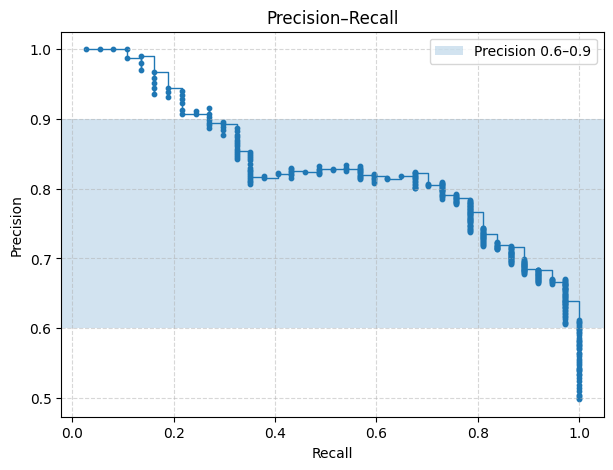

In [ ]:
band = plot_pr_from_threshold_table(best_tuned_model, h2o_valid, precision_band=(0.6, 0.9))

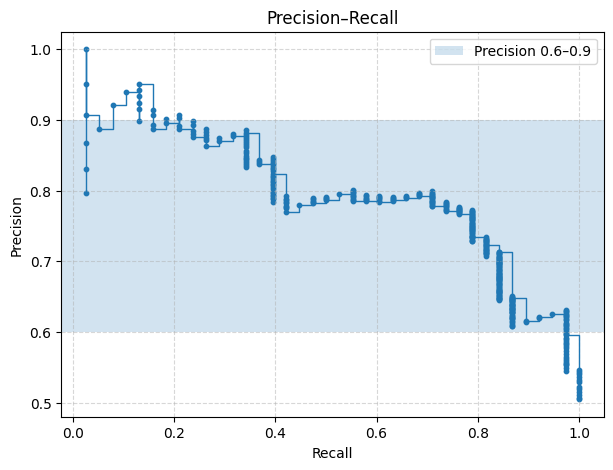

In [ ]:
band = plot_pr_from_threshold_table(best_tuned_model, h2o_test, precision_band=(0.6, 0.9))

# dataset_version = "v0_raw"

precision_target = 0.70

In [ ]:
dataset_version = "v0_raw"

precision_target = 0.70

In [ ]:
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")

train_df, valid_df, test_df, class_weights = prepare_data(
    raw_df,dataset_version
)

# Step 2: Train AutoML
aml, h2o_train, h2o_valid, h2o_test = train_models(train_df, valid_df, test_df,dataset_version)

# Step 3: Fine tune
best_tuned_model, grid, final_thr= fine_tune_best_model(
    aml,
    h2o_train,
    h2o_valid,
    h2o_test,
    metric="AUCPR",
    version_name=dataset_version,
    precision_target=precision_target
)

# Step 4: Final threshold selection
# final_thr, prec_val, rec_val = pick_threshold_for_precision(
#     best_tuned_model,
#     h2o_valid,
#     target_precision=0.70
# )

# Step 5: Final evaluation on test
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, final_thr)

[codecarbon WARNING @ 22:15:22] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 22:15:22] [setup] RAM Tracking...
[codecarbon INFO @ 22:15:22] [setup] CPU Tracking...
[codecarbon WARNING @ 22:15:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 22:15:23] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 22:15:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 22:15:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 22:15:23] [setup] GPU Tracking...
[codecarbon INFO @ 22:15:23] No GPU found.
[codecarbon INFO @ 22:15:23] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 27 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_mjhs0b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.842 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |

[codecarbon INFO @ 22:15:26] Energy consumed for RAM : 0.008039 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:26] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:26] Energy consumed for All CPU : 0.034170 kWh
[codecarbon INFO @ 22:15:26] 0.042208 kWh of electricity and 0.000000 L of water were used since the beginning.


████

[codecarbon INFO @ 22:15:30] Energy consumed for RAM : 0.012579 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:30] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:30] Energy consumed for All CPU : 0.053465 kWh
[codecarbon INFO @ 22:15:30] 0.066044 kWh of electricity and 0.000000 L of water were used since the beginning.


███████

[codecarbon INFO @ 22:15:36] Energy consumed for RAM : 0.012663 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:36] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:36] Energy consumed for All CPU : 0.053822 kWh
[codecarbon INFO @ 22:15:36] 0.066484 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:15:36] 0.003186 g.CO2eq/s mean an estimation of 100.45922883799837 kg.CO2eq/year


███████

[codecarbon INFO @ 22:15:39] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:39] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:39] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 22:15:39] 0.000219 kWh of electricity and 0.000000 L of water were used since the beginning.


████

[codecarbon INFO @ 22:15:41] Energy consumed for RAM : 0.008080 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:41] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:41] Energy consumed for All CPU : 0.034347 kWh
[codecarbon INFO @ 22:15:41] 0.042427 kWh of electricity and 0.000000 L of water were used since the beginning.


██

[codecarbon INFO @ 22:15:45] Energy consumed for RAM : 0.012620 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:45] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:45] Energy consumed for All CPU : 0.053642 kWh
[codecarbon INFO @ 22:15:45] 0.066262 kWh of electricity and 0.000000 L of water were used since the beginning.


██

[codecarbon INFO @ 22:15:51] Energy consumed for RAM : 0.012704 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:51] Energy consumed for All CPU : 0.053999 kWh
[codecarbon INFO @ 22:15:51] 0.066703 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:15:54] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:54] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:54] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 22:15:54] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 22:15:56] Energy consumed for RAM : 0.008122 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:15:56] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:15:56] Energy consumed for All CPU : 0.034524 kWh
[codecarbon INFO @ 22:15:56] 0.042646 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:16:00] Energy consumed for RAM : 0.012662 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:00] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:00] Energy consumed for All CPU : 0.053819 kWh
[codecarbon INFO @ 22:16:00] 0.066481 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:16:00] 0.003186 g.CO2eq/s mean an estimation of 100.46716557523777 kg.CO2eq/year


█

[codecarbon INFO @ 22:16:06] Energy consumed for RAM : 0.012746 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:06] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:06] Energy consumed for All CPU : 0.054176 kWh
[codecarbon INFO @ 22:16:06] 0.066921 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:16:09] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:09] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:09] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 22:16:09] 0.000656 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 22:16:11] Energy consumed for RAM : 0.008164 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:11] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:11] Energy consumed for All CPU : 0.034701 kWh
[codecarbon INFO @ 22:16:11] 0.042864 kWh of electricity and 0.000000 L of water were used since the beginning.


███████████

[codecarbon INFO @ 22:16:15] Energy consumed for RAM : 0.012703 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:15] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:15] Energy consumed for All CPU : 0.053996 kWh
[codecarbon INFO @ 22:16:15] 0.066700 kWh of electricity and 0.000000 L of water were used since the beginning.


████████

[codecarbon INFO @ 22:16:21] Energy consumed for RAM : 0.012787 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:21] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:21] Energy consumed for All CPU : 0.054353 kWh
[codecarbon INFO @ 22:16:21] 0.067140 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 22:16:24] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:24] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:24] Energy consumed for All CPU : 0.000708 kWh
[codecarbon INFO @ 22:16:24] 0.000875 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:16:26] Energy consumed for RAM : 0.008205 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:26] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:26] Energy consumed for All CPU : 0.034878 kWh
[codecarbon INFO @ 22:16:26] 0.043083 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 22:16:30] Energy consumed for RAM : 0.012745 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:30] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:30] Energy consumed for All CPU : 0.054173 kWh
[codecarbon INFO @ 22:16:30] 0.066918 kWh of electricity and 0.000000 L of water were used since the beginning.


█████████████| (done) 100%


2025/11/29 22:16:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
[codecarbon INFO @ 22:16:36] Energy consumed for RAM : 0.012829 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:36] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:36] Energy consumed for All CPU : 0.054530 kWh
[codecarbon INFO @ 22:16:36] 0.067359 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/11/29 22:16:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame

Test AUCPR: 0.7626020655755049
Default threshold=0.5 → Precision=0.773, Recall=0.395, F1=0.523
Carbon Emissions (kg CO₂): 0.000239


[codecarbon WARNING @ 22:16:39] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 22:16:39] [setup] RAM Tracking...
[codecarbon INFO @ 22:16:39] [setup] CPU Tracking...
[codecarbon WARNING @ 22:16:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 22:16:41] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 22:16:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 22:16:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 22:16:41] [setup] GPU Tracking...
[codecarbon INFO @ 22:16:41] No GPU found.
[codecarbon INFO @ 22:16:41] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

xgboost Grid Build progress: |█

[codecarbon INFO @ 22:16:45] Energy consumed for RAM : 0.012787 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:45] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:45] Energy consumed for All CPU : 0.054350 kWh
[codecarbon INFO @ 22:16:45] 0.067137 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:16:51] Energy consumed for RAM : 0.012871 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:51] Energy consumed for All CPU : 0.054707 kWh
[codecarbon INFO @ 22:16:51] 0.067577 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:16:56] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:16:56] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:16:56] Energy consumed for All CPU

██████████████████████████████████████████████████| (done) 100%


[codecarbon INFO @ 22:18:11] Energy consumed for RAM : 0.000249 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:18:11] Delta energy consumed for CPU with constant : 0.000175 kWh, power : 42.5 W
[codecarbon INFO @ 22:18:11] Energy consumed for All CPU : 0.001060 kWh
[codecarbon INFO @ 22:18:11] 0.001309 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/11/29 22:18:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
[codecarbon INFO @ 22:18:11] Energy consumed for RAM : 0.008497 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:18:11] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:18:11] Energy consumed for All CPU : 0.036116 kWh
[codecarbon INFO @ 22:18:11] 0.044613 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:18:15] Energy consumed for RAM : 0.013037 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:18:15] Delta energy consumed fo

Tuned XGBOOST Test AUCPR: 0.8056
Chosen threshold=0.18487 | Precision=0.719 | Recall=0.892


[codecarbon INFO @ 22:18:21] Energy consumed for RAM : 0.013120 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:18:21] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:18:21] Energy consumed for All CPU : 0.055769 kWh
[codecarbon INFO @ 22:18:21] 0.068889 kWh of electricity and 0.000000 L of water were used since the beginning.


Could not find exact threshold 0.1848733276128769; using closest threshold found 0.18348944187164307.
Could not find exact threshold 0.1848733276128769; using closest threshold found 0.18348944187164307.
[TEST] threshold=0.18487 | precision=0.695 | recall=0.842
Could not find exact threshold 0.1848733276128769; using closest threshold found 0.18348944187164307.
Could not find exact threshold 0.1848733276128769; using closest threshold found 0.18348944187164307.
[TEST] threshold=0.18487 | precision=0.695 | recall=0.842


In [ ]:
perf = best_tuned_model.model_performance(h2o_valid)
df = perf.thresholds_and_metric_scores().as_data_frame()

In [ ]:
df[['threshold', 'precision', 'recall']].sort_values(by='recall', ascending=False)
band_df = df[df["precision"] >= 0.7]
band_df[["threshold", "precision", "recall"]].sort_values(by='recall', ascending=False)

,threshold,precision,recall
259,0.152087,0.700455,0.891892
258,0.153661,0.701216,0.891892
241,0.183915,0.717588,0.891892
240,0.184873,0.719188,0.891892
256,0.158014,0.703509,0.891892
...,...,...,...
4,0.903846,1.000000,0.135135
3,0.907620,1.000000,0.108108
2,0.919644,1.000000,0.081081
1,0.920268,1.000000,0.054054


In [ ]:
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, 0.163544)

Could not find exact threshold 0.163544; using closest threshold found 0.16313419242699942.
Could not find exact threshold 0.163544; using closest threshold found 0.16313419242699942.
[TEST] threshold=0.16354 | precision=0.691 | recall=0.868


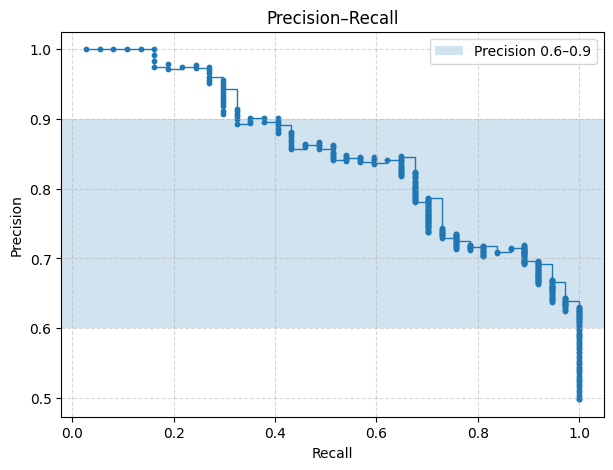

In [ ]:
band = plot_pr_from_threshold_table(best_tuned_model, h2o_valid, precision_band=(0.6, 0.9))

[codecarbon INFO @ 22:19:00] Energy consumed for RAM : 0.013162 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:19:00] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:19:00] Energy consumed for All CPU : 0.055944 kWh
[codecarbon INFO @ 22:19:00] 0.069105 kWh of electricity and 0.000000 L of water were used since the beginning.


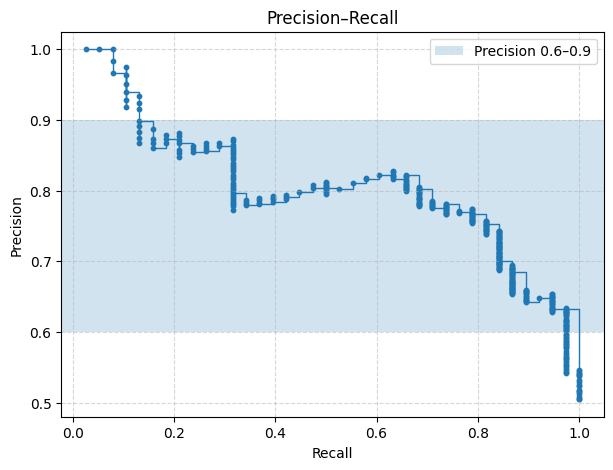

In [ ]:
band = plot_pr_from_threshold_table(best_tuned_model, h2o_test, precision_band=(0.6, 0.9))

In [ ]:
mlflow.end_run()

# dataset_version = "v2_dropped"

precision_target = 0.70

In [ ]:
dataset_version = "v2_dropped"

precision_target = 0.70

In [ ]:
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")

train_df, valid_df, test_df, class_weights = prepare_data(
    raw_df,dataset_version
)

In [ ]:
train_df.to_csv(f"{sys.path[-1]}/data/train_df.csv")
valid_df.to_csv(f"{sys.path[-1]}/data/valid_df.csv")
test_df.to_csv(f"{sys.path[-1]}/data/test_df.csv")

In [ ]:
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")

train_df, valid_df, test_df, class_weights = prepare_data(
    raw_df,dataset_version
)

# Step 2: Train AutoML
aml, h2o_train, h2o_valid, h2o_test = train_models(train_df, valid_df, test_df,dataset_version)

# Step 3: Fine tune
best_tuned_model, grid, final_thr= fine_tune_best_model(
    aml,
    h2o_train,
    h2o_valid,
    h2o_test,
    metric="AUCPR",
    version_name=dataset_version,
    precision_target=precision_target
)

# Step 4: Final threshold selection
# final_thr, prec_val, rec_val = pick_threshold_for_precision(
#     best_tuned_model,
#     h2o_valid,
#     target_precision=0.70
# )

# Step 5: Final evaluation on test
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, final_thr)

[codecarbon WARNING @ 04:58:20] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 04:58:20] [setup] RAM Tracking...
[codecarbon INFO @ 04:58:20] [setup] CPU Tracking...
[codecarbon WARNING @ 04:58:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 04:58:21] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 04:58:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 04:58:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 04:58:21] [setup] GPU Tracking...
[codecarbon INFO @ 04:58:21] No GPU found.
[codecarbon INFO @ 04:58:21] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 23 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_j2zikj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.138 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:58:24.109: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█
04:58:27.248: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

██
04:58:30.294: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█
04:58:33.168: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

██

[codecarbon INFO @ 04:58:36] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:58:36] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 04:58:36] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 04:58:36] 0.000219 kWh of electricity and 0.000000 L of water were used since the beginning.



04:58:36.418: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]
04:58:37.388: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█
04:58:38.339: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█
04:58:39.676: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

██
04:58:40.879: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█████
04:58:44.874: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█████

[codecarbon INFO @ 04:58:51] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:58:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 04:58:51] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 04:58:51] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.


██

[codecarbon INFO @ 04:59:06] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:59:06] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 04:59:06] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 04:59:06] 0.000656 kWh of electricity and 0.000000 L of water were used since the beginning.


██

[codecarbon INFO @ 04:59:21] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:59:21] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 04:59:21] Energy consumed for All CPU : 0.000708 kWh
[codecarbon INFO @ 04:59:21] 0.000875 kWh of electricity and 0.000000 L of water were used since the beginning.


██████████████████████

[codecarbon INFO @ 04:59:36] Energy consumed for RAM : 0.000208 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:59:36] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 04:59:36] Energy consumed for All CPU : 0.000885 kWh
[codecarbon INFO @ 04:59:36] 0.001093 kWh of electricity and 0.000000 L of water were used since the beginning.


█████████████████| (done) 100%


2025/12/05 04:59:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
[codecarbon INFO @ 04:59:51] Energy consumed for RAM : 0.000250 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 04:59:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 04:59:51] Energy consumed for All CPU : 0.001062 kWh
[codecarbon INFO @ 04:59:51] 0.001312 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/12/05 04:59:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame

Test AUCPR: 0.7892727655278498
Default threshold=0.5 → Precision=0.735, Recall=0.688, F1=0.710
Carbon Emissions (kg CO₂): 0.000379


[codecarbon WARNING @ 04:59:52] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 04:59:52] [setup] RAM Tracking...
[codecarbon INFO @ 04:59:52] [setup] CPU Tracking...
[codecarbon WARNING @ 04:59:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 04:59:54] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 04:59:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 04:59:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 04:59:54] [setup] GPU Tracking...
[codecarbon INFO @ 04:59:54] No GPU found.
[codecarbon INFO @ 04:59:54] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

xgboost Grid Build progress: |█

[codecarbon INFO @ 05:00:09] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 05:00:09] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 05:00:09] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 05:00:09] 0.000219 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 05:00:24] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 05:00:24] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 05:00:24] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 05:00:24] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 05:00:39] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 05:00:39] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 05:00:39] Energy consumed for All CPU

██████████████████████████████████████████████████| (done) 100%


[codecarbon INFO @ 05:00:54] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 05:00:54] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 05:00:54] Energy consumed for All CPU : 0.000708 kWh
[codecarbon INFO @ 05:00:54] 0.000875 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 05:01:00] Energy consumed for RAM : 0.000182 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 05:01:00] Delta energy consumed for CPU with constant : 0.000066 kWh, power : 42.5 W
[codecarbon INFO @ 05:01:00] Energy consumed for All CPU : 0.000775 kWh
[codecarbon INFO @ 05:01:00] 0.000957 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/12/05 05:01:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/05 05:01:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter whe

Tuned XGBOOST Test AUCPR: 0.7973
Chosen threshold=0.43040 | Precision=0.734 | Recall=0.935
Could not find exact threshold 0.4304031729698181; using closest threshold found 0.4288244843482971.
Could not find exact threshold 0.4304031729698181; using closest threshold found 0.4288244843482971.
[TEST] threshold=0.43040 | precision=0.713 | recall=0.781
Could not find exact threshold 0.4304031729698181; using closest threshold found 0.4288244843482971.
Could not find exact threshold 0.4304031729698181; using closest threshold found 0.4288244843482971.
[TEST] threshold=0.43040 | precision=0.713 | recall=0.781


In [ ]:
perf = best_tuned_model.model_performance(h2o_valid)
df = perf.thresholds_and_metric_scores().as_data_frame()

In [ ]:
df[['threshold', 'precision', 'recall']].sort_values(by='recall', ascending=False)
band_df = df[df["precision"] >= 0.7]
band_df[["threshold", "precision", "recall"]].sort_values(by='recall', ascending=False)

,threshold,precision,recall
243,0.357498,0.709168,0.935484
242,0.359650,0.709938,0.935484
241,0.362173,0.710710,0.935484
240,0.363043,0.711484,0.935484
239,0.364723,0.712259,0.935484
...,...,...,...
4,0.870579,0.849251,0.032258
5,0.868978,0.818408,0.032258
6,0.862454,0.789726,0.032258
7,0.861946,0.762987,0.032258


In [ ]:
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, 0.163544)

[codecarbon INFO @ 22:23:45] Energy consumed for RAM : 0.013953 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:23:45] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:23:45] Energy consumed for All CPU : 0.059307 kWh
[codecarbon INFO @ 22:23:45] 0.073260 kWh of electricity and 0.000000 L of water were used since the beginning.


Could not find exact threshold 0.163544; using closest threshold found 0.165218748152256.
Could not find exact threshold 0.163544; using closest threshold found 0.165218748152256.
[TEST] threshold=0.16354 | precision=0.645 | recall=0.875


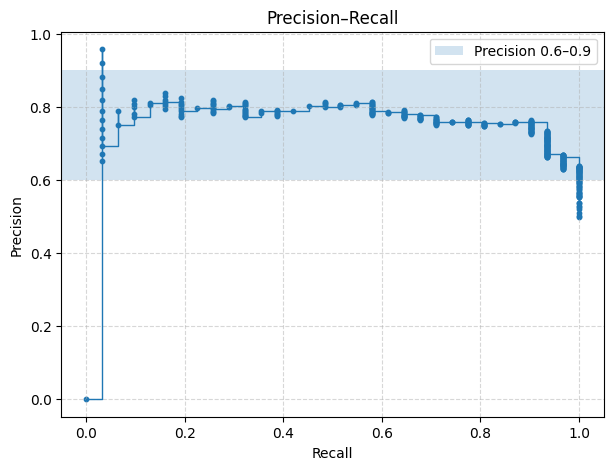

In [ ]:
band = plot_pr_from_threshold_table(best_tuned_model, h2o_valid, precision_band=(0.6, 0.9))

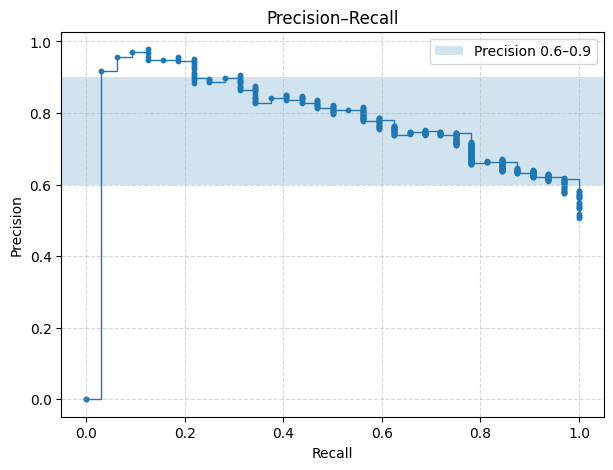

In [ ]:
band = plot_pr_from_threshold_table(best_tuned_model, h2o_test, precision_band=(0.6, 0.9))

In [ ]:
mlflow.end_run()

# dataset_version = "v3_imputed"

precision_target = 0.70

In [ ]:
dataset_version = "v3_imputed"

precision_target = 0.70

In [ ]:
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")

train_df, valid_df, test_df, class_weights = prepare_data(
    raw_df,dataset_version
)

# Step 2: Train AutoML
aml, h2o_train, h2o_valid, h2o_test = train_models(train_df, valid_df, test_df,dataset_version)

# Step 3: Fine tune
best_tuned_model, grid, final_thr= fine_tune_best_model(
    aml,
    h2o_train,
    h2o_valid,
    h2o_test,
    metric="AUCPR",
    version_name=dataset_version,
    precision_target=precision_target
)

# Step 4: Final threshold selection
# final_thr, prec_val, rec_val = pick_threshold_for_precision(
#     best_tuned_model,
#     h2o_valid,
#     target_precision=0.70
# )

# Step 5: Final evaluation on test
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, final_thr)

[codecarbon WARNING @ 22:23:46] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 22:23:46] [setup] RAM Tracking...
[codecarbon INFO @ 22:23:46] [setup] CPU Tracking...
[codecarbon WARNING @ 22:23:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 22:23:47] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 22:23:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 22:23:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 22:23:47] [setup] GPU Tracking...
[codecarbon INFO @ 22:23:47] No GPU found.
[codecarbon INFO @ 22:23:47] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 36 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_mjhs0b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.759 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
22:23:49.293: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]


22:23:50.930: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█

[codecarbon INFO @ 22:23:51] Energy consumed for RAM : 0.014037 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:23:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:23:51] Energy consumed for All CPU : 0.059664 kWh
[codecarbon INFO @ 22:23:51] 0.073701 kWh of electricity and 0.000000 L of water were used since the beginning.



22:23:51.403: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]
22:23:52.164: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

██
22:23:53.243: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

██
22:23:53.699: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]
22:23:54.205: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

██
22:23:54.748: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]
22:23:55.388: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

███
22:23:56.181: _train param, Dropping bad and constant columns: [is_bmi_missing, glucose_outlier_flag]

█

[codecarbon INFO @ 22:23:56] Energy consumed for RAM : 0.009454 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:23:56] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:23:56] Energy consumed for All CPU : 0.040188 kWh
[codecarbon INFO @ 22:23:56] 0.049642 kWh of electricity and 0.000000 L of water were used since the beginning.


█████████

[codecarbon INFO @ 22:24:00] Energy consumed for RAM : 0.013995 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:00] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:00] Energy consumed for All CPU : 0.059484 kWh
[codecarbon INFO @ 22:24:00] 0.073479 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:24:00] 0.003185 g.CO2eq/s mean an estimation of 100.45429004690992 kg.CO2eq/year


████

[codecarbon INFO @ 22:24:02] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:02] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:02] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 22:24:02] 0.000219 kWh of electricity and 0.000000 L of water were used since the beginning.


███

[codecarbon INFO @ 22:24:06] Energy consumed for RAM : 0.014079 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:06] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:06] Energy consumed for All CPU : 0.059841 kWh
[codecarbon INFO @ 22:24:06] 0.073920 kWh of electricity and 0.000000 L of water were used since the beginning.


██

[codecarbon INFO @ 22:24:11] Energy consumed for RAM : 0.009496 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:11] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:11] Energy consumed for All CPU : 0.040365 kWh
[codecarbon INFO @ 22:24:11] 0.049861 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:24:15] Energy consumed for RAM : 0.014036 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:15] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:15] Energy consumed for All CPU : 0.059661 kWh
[codecarbon INFO @ 22:24:15] 0.073698 kWh of electricity and 0.000000 L of water were used since the beginning.


█

[codecarbon INFO @ 22:24:17] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:17] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:17] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 22:24:17] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:24:21] Energy consumed for RAM : 0.014120 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:21] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:21] Energy consumed for All CPU : 0.060018 kWh
[codecarbon INFO @ 22:24:21] 0.074139 kWh of electricity and 0.000000 L of water were used since the beginning.


█████

[codecarbon INFO @ 22:24:26] Energy consumed for RAM : 0.009538 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:26] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:26] Energy consumed for All CPU : 0.040542 kWh
[codecarbon INFO @ 22:24:26] 0.050080 kWh of electricity and 0.000000 L of water were used since the beginning.


█████████

[codecarbon INFO @ 22:24:30] Energy consumed for RAM : 0.014078 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:30] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:30] Energy consumed for All CPU : 0.059838 kWh
[codecarbon INFO @ 22:24:30] 0.073916 kWh of electricity and 0.000000 L of water were used since the beginning.


██

[codecarbon INFO @ 22:24:32] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:32] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:32] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 22:24:32] 0.000656 kWh of electricity and 0.000000 L of water were used since the beginning.


███

[codecarbon INFO @ 22:24:36] Energy consumed for RAM : 0.014162 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:36] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:36] Energy consumed for All CPU : 0.060195 kWh
[codecarbon INFO @ 22:24:36] 0.074357 kWh of electricity and 0.000000 L of water were used since the beginning.


██████████████| (done) 100%


2025/11/29 22:24:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
[codecarbon INFO @ 22:24:41] Energy consumed for RAM : 0.009579 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:41] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:41] Energy consumed for All CPU : 0.040719 kWh
[codecarbon INFO @ 22:24:41] 0.050298 kWh of electricity and 0.000000 L of water were used since the beginning.
2025/11/29 22:24:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame

Test AUCPR: 0.7926940822005615
Default threshold=0.5 → Precision=0.763, Recall=0.789, F1=0.776
Carbon Emissions (kg CO₂): 0.000178


[codecarbon WARNING @ 22:24:43] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 22:24:43] [setup] RAM Tracking...
[codecarbon INFO @ 22:24:43] [setup] CPU Tracking...
[codecarbon WARNING @ 22:24:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 22:24:44] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 22:24:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 22:24:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 22:24:44] [setup] GPU Tracking...
[codecarbon INFO @ 22:24:44] No GPU found.
[codecarbon INFO @ 22:24:44] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

gbm Grid Build progress: |█

[codecarbon INFO @ 22:24:51] Energy consumed for RAM : 0.014204 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:51] Energy consumed for All CPU : 0.060372 kWh
[codecarbon INFO @ 22:24:51] 0.074576 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:24:56] Energy consumed for RAM : 0.009621 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:56] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:56] Energy consumed for All CPU : 0.040896 kWh
[codecarbon INFO @ 22:24:56] 0.050517 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:24:59] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:24:59] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:24:59] Energy consumed for All CPU

██████████████████████████████████████████████████████| (done) 100%


[codecarbon INFO @ 22:25:14] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:25:14] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:25:14] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 22:25:14] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:25:15] Energy consumed for RAM : 0.000085 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:25:15] Delta energy consumed for CPU with constant : 0.000006 kWh, power : 42.5 W
[codecarbon INFO @ 22:25:15] Energy consumed for All CPU : 0.000360 kWh
[codecarbon INFO @ 22:25:15] 0.000444 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 22:25:15] Energy consumed for RAM : 0.014203 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 22:25:15] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 22:25:15] Energy consumed for All CPU

Tuned GBM Test AUCPR: 0.8050
Chosen threshold=0.38839 | Precision=0.719 | Recall=0.892
Could not find exact threshold 0.3883871874250886; using closest threshold found 0.38836439210499046.
Could not find exact threshold 0.3883871874250886; using closest threshold found 0.38836439210499046.
[TEST] threshold=0.38839 | precision=0.693 | recall=0.842
Could not find exact threshold 0.3883871874250886; using closest threshold found 0.38836439210499046.
Could not find exact threshold 0.3883871874250886; using closest threshold found 0.38836439210499046.
[TEST] threshold=0.38839 | precision=0.693 | recall=0.842


In [ ]:
perf = best_tuned_model.model_performance(h2o_valid)
df = perf.thresholds_and_metric_scores().as_data_frame()

In [ ]:
df[['threshold', 'precision', 'recall']].sort_values(by='recall', ascending=False)
band_df = df[df["precision"] >= 0.7]
band_df[["threshold", "precision", "recall"]].sort_values(by='recall', ascending=False)

,threshold,precision,recall
224,0.345005,0.702743,0.891892
226,0.325429,0.700455,0.891892
225,0.341066,0.701216,0.891892
209,0.388387,0.719188,0.891892
210,0.385956,0.718387,0.891892
...,...,...,...
2,0.837512,1.000000,0.081081
3,0.835627,0.983242,0.081081
4,0.831656,0.967036,0.081081
1,0.844686,1.000000,0.054054


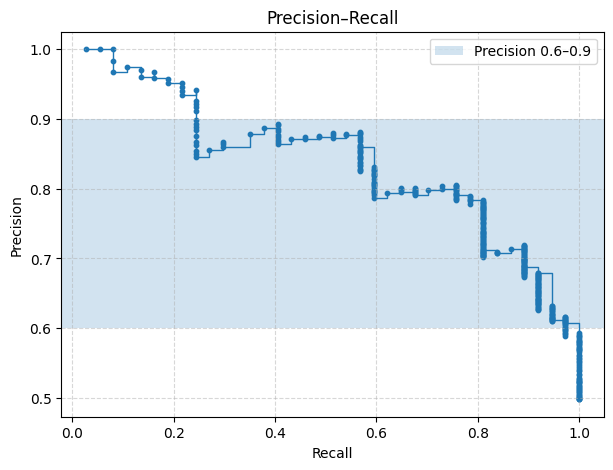

In [ ]:
band = plot_pr_from_threshold_table(best_tuned_model, h2o_valid, precision_band=(0.6, 0.9))

In [ ]:
results = evaluate_model_at_threshold(best_tuned_model, h2o_test, 0.163544)

Could not find exact threshold 0.163544; using closest threshold found 0.16326646274916531.
Could not find exact threshold 0.163544; using closest threshold found 0.16326646274916531.
[TEST] threshold=0.16354 | precision=0.639 | recall=0.868


In [ ]:
mlflow.end_run()

In [ ]:
best_tuned_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: Grid_XGBoost_py_15_sid_a07f_model_python_1764905715329_818_model_2


Model Summary: 
    number_of_trees
--  -----------------
    50

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.13528225742834604
RMSE: 0.36780736456512947
LogLoss: 0.41412310986333506
Mean Per-Class Error: 0.19246367156597416
AUC: 0.8817629179331309
AUCPR: 0.8490195287070258
Gini: 0.7635258358662618

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4704172435832854
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      1197  520   0.3029   (520.0/1717.0)
1      141   1576  0.0821   (141.0/1717.0)
Total  1338  2096  0.1925   (661.0/3434.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.470417     0.826652  205
max f2                       0.20083      0.914905  304
max f0point5                 0.586685     0.80353   155
max accuracy                 0.561754     0.813563  165
max precision                0.919145     1         0
max recall                   0.20083      1         304
max specificity              0.919145     1         0
max absolute_mcc             0.470417     0.6306    205
max min_per_class_accuracy   0.593336     0.796049  151
max mean_per_class_accuracy  0.561754     0.813563  165
max tns                      0.919145     1718      0
max fns                      0.919145     1706.23   0
max fps                      0.01689      1718      399
max tps                      0.20083      1718      304
max tnr                      0.919145     1         0
max fnr                      0.919145     0.993151  0
max fpr                      0.01689      1         399
max tpr                      0.20083      1         304

Gains/Lift Table: Avg response rate: 100.00 %, avg score: 106.20 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0                           0.919145           0       nan                0                0         nan                         nan                 0               0                          -100    nan                0
2        0.0273973                   0.894921           1       1                  1                0.999762  1                           0.999762            0.0273973       0.0273973                  0       0                  0.0273973
3        0.123288                    0.86068            1       1                  1                1.02326   1                           1.01803             0.0958904       0.123288                   0       0                  0.123288
4        0.212329                    0.836484           1       1                  1                1.05216   1                           1.03234             0.0890411       0.212329                   0       0                  0.212329
5        0.39726                     0.79125            1       1                  1                1.01566   1                           1.02458             0.184932        0.39726                    0       0                  0.39726
6        0.568493                    0.7415             1       1                  1                0.993962  1                           1.01535             0.171233        0.568493                   0       0                  0.568493
7        0.719178                    0.659586           1       1                  1                1.0790

# Load v0 best model

In [40]:
import mlflow
import mlflow.h2o

mlflow.set_tracking_uri("file:/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis/mlflow_runs")
mlflow.set_experiment("stroke_analysis")

run_id = "23cd12e8742b42a686c12a675fda5955"   # copy from MLflow UI

# 1) Load model
model_uri = f"runs:/{run_id}/xgboost_tuned_model"
best_model = mlflow.h2o.load_model(model_uri)

# 2) Load threshold from metrics
client = mlflow.tracking.MlflowClient()
run = client.get_run(run_id)
best_threshold = float(run.data.metrics["threshold_selected"])
print("Loaded threshold:", best_threshold)

Loaded threshold: 0.1848733276128769


In [41]:
best_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: Grid_XGBoost_py_43_sid_a432_model_python_1764449258721_18135_model_1


Model Summary: 
    number_of_trees
--  -----------------
    36

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08183902195956091
RMSE: 0.2860752033287068
LogLoss: 0.28249511773817193
Mean Per-Class Error: 0.09049401981348443
AUC: 0.9597034057170651
AUCPR: 0.9466852457409233
Gini: 0.9194068114341303

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5033713110938964
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      1536  251   0.1405   (251.0/1787.0)
1      71    1716  0.0397   (71.0/1787.0)
Total  1607  1967  0.0901   (322.0/3574.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.503371     0.913837  174
max f2                       0.3383       0.945343  233
max f0point5                 0.658839     0.909323  121
max accuracy                 0.564614     0.911235  155
max precision                0.961651     1         0
max recall                   0.200727     1         285
max specificity              0.961651     1         0
max absolute_mcc             0.564614     0.823546  155
max min_per_class_accuracy   0.603537     0.902299  139
max mean_per_class_accuracy  0.564614     0.911235  155
max tns                      0.961651     1788.5    0
max fns                      0.961651     1778.22   0
max fps                      0.00517343   1788.5    399
max tps                      0.200727     1788.5    285
max tnr                      0.961651     1         0
max fnr                      0.961651     0.994253  0
max fpr                      0.00517343   1         399
max tpr                      0.200727     1         285

Gains/Lift Table: Avg response rate: 100.00 %, avg score: 99.38 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0                           0.961651           0       nan                0                0         nan                         nan                 0               0                          -100    nan                0
2        0.0229885                   0.950856           1       1                  1                0.982938  1                           0.982938            0.0229885       0.0229885                  0       0                  0.0229885
3        0.126437                    0.920406           1       1                  1                0.973211  1                           0.97498             0.103448        0.126437                   0       0                  0.126437
4        0.224138                    0.873767           1       1                  1                0.9799    1                           0.977124            0.0977011       0.224138                   0       0                  0.224138
5        0.425287                    0.809966           1       1                  1                0.914257  1                           0.94739             0.201149        0.425287                   0       0                  0.425287
6        0.62069                     0.764557           1       1                  1                0.869516  1                           0.922874            0.195402        0.62069                    0       0                  0.62069
7        0.810345                    0.681784           1       1                  1                0.85622

In [17]:
dataset_version = "v0_raw"
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")

train_df, valid_df, test_df, class_weights = prepare_data(
    raw_df,dataset_version
)

test_df_clean = test_df.drop(columns=['weights'])
h2o_test_clean = h2o.H2OFrame(test_df_clean)

valid_df_clean = valid_df.drop(columns=['weights'])
h2o_valid_clean = h2o.H2OFrame(valid_df_clean)

pred = best_model.predict(h2o_test_clean)
pred.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.236358,0.763642
0,0.971119,0.0288813
0,0.990486,0.00951366
1,0.808389,0.191611
1,0.664638,0.335362
1,0.270087,0.729913
1,0.143704,0.856296
0,0.94144,0.0585603
0,0.95233,0.0476702
0,0.990612,0.00938814


In [18]:
pred_df = pred.as_data_frame()

threshold = best_threshold
print(threshold)
pred_df["custom_pred"] = (pred_df["p1"] >= threshold).astype(int)


test_df_reset = test_df.reset_index(drop=True)
pred_df_reset = pred_df.reset_index(drop=True)

merged = pd.concat([test_df_reset, pred_df_reset], axis=1)

0.1848733276128769


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(merged['stroke'], merged['custom_pred'])

array([[455, 274],
       [  6,  32]])

In [20]:
print(classification_report(merged['stroke'], merged['custom_pred']))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       729
           1       0.10      0.84      0.19        38

    accuracy                           0.63       767
   macro avg       0.55      0.73      0.48       767
weighted avg       0.94      0.63      0.74       767



In [35]:
import mlflow
import pandas as pd
import numpy as np
import h2o
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_last_model_at_threshold(
    model,
    dataset,
    threshold,
    dataset_version,
    raw_df,
    experiment_name="stroke_analysis"
):
    # Make sure experiment is set
    mlflow.set_experiment(experiment_name)

    # Start a new MLflow run for this evaluation
    with mlflow.start_run(run_name=f"eval_{dataset}_v{dataset_version}_thr_{threshold:.3f}"):

        # ---- Log params & tags ----
        mlflow.log_param("eval_dataset", dataset)
        mlflow.log_param("dataset_version", dataset_version)
        mlflow.log_param("decision_threshold", threshold)

        mlflow.set_tags({
            "stage": "evaluation",
            "eval_split": dataset,
            "eval_type": "threshold_sweep",
        })

        # ---- Prepare data ----
        train_df, valid_df, test_df, class_weights = prepare_data(raw_df, dataset_version)

        if dataset == 'test':
            df_clean = test_df.drop(columns=['weights'])
        else:
            df_clean = valid_df.drop(columns=['weights'])

        h2o_test_func = h2o.H2OFrame(df_clean)
        df_func = df_clean.copy()

        # ---- Predict ----
        pred = model.predict(h2o_test_func)   # use the model argument, not best_model
        pred_df = pred.as_data_frame()
        pred_df["custom_pred"] = (pred_df["p1"] >= threshold).astype(int)

        df_reset = df_func.reset_index(drop=True)
        pred_reset = pred_df.reset_index(drop=True)
        merged = pd.concat([df_reset, pred_reset], axis=1)

        y_true = merged['stroke']
        y_pred = merged['custom_pred']

        # ---- Print for console ----
        print(classification_report(y_true, y_pred))
        cm = confusion_matrix(y_true, y_pred)
        print(cm)

        # ---- Log metrics to MLflow ----
        acc = accuracy_score(y_true, y_pred)
        prec_1 = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
        rec_1 = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
        f1_1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision_pos", prec_1)
        mlflow.log_metric("recall_pos", rec_1)
        mlflow.log_metric("f1_pos", f1_1)

        # Optionally: log confusion matrix as an artifact
        cm_df = pd.DataFrame(
            cm,
            index=["true_0", "true_1"],
            columns=["pred_0", "pred_1"]
        )
        cm_path = f"confusion_matrix_{dataset}_v{dataset_version}_thr_{threshold:.3f}.csv"
        cm_df.to_csv(cm_path, index=True)
        mlflow.log_artifact(cm_path, artifact_path="confusion_matrices")

        return merged, cm

In [42]:
dataset_version = "v0_raw"
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")


evaluate_last_model_at_threshold(best_model,'test', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       729
           1       0.10      0.84      0.19        38

    accuracy                           0.63       767
   macro avg       0.55      0.73      0.48       767
weighted avg       0.94      0.63      0.74       767

[[455 274]
 [  6  32]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(        id  gender   age  hypertension  heart_disease ever_married work_type  \
 0    28326  Female  79.0             0              0          Yes   Private   
 1    10333  Female  45.0             0              0          Yes   Private   
 2    42400  Female   2.0             0              0           No  children   
 3    47668  Female  49.0             0              0          Yes   Private   
 4    55591    Male  50.0             0              0          Yes   Private   
 ..     ...     ...   ...           ...            ...          ...       ...   
 762  54301    Male  54.0             0              0          Yes   Private   
 763  59368  Female  78.0             0              0          Yes   Private   
 764  45053    Male  64.0             0              0          Yes  Govt_job   
 765  67499    Male  10.0             0              0           No  children   
 766  68034  Female  53.0             1              0          Yes  Govt_job   
 
     residence_type  avg_g

In [43]:
dataset_version = "v0_raw"
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")


evaluate_last_model_at_threshold(best_model,'valid', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.99      0.65      0.79       729
           1       0.12      0.89      0.20        37

    accuracy                           0.67       766
   macro avg       0.55      0.77      0.50       766
weighted avg       0.95      0.67      0.76       766

[[477 252]
 [  4  33]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(        id  gender   age  hypertension  heart_disease ever_married  \
 0     6576  Female  33.0             0              0          Yes   
 1    35333    Male  76.0             1              0          Yes   
 2    40264  Female  17.0             0              0           No   
 3    20655    Male  16.0             0              0           No   
 4    15964  Female  64.0             1              0          Yes   
 ..     ...     ...   ...           ...            ...          ...   
 761  22414  Female  17.0             0              0           No   
 762   4383  Female  64.0             0              0          Yes   
 763  54724  Female  81.0             0              0           No   
 764  34567  Female  81.0             1              0          Yes   
 765   7538  Female  55.0             0              0          Yes   
 
          work_type residence_type  avg_glucose_level   bmi  ...  \
 0          Private          Urban              84.48  23.2  ...   
 1        

# Load v1 best model

In [32]:
import mlflow
import mlflow.h2o

mlflow.set_tracking_uri("file:/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis/mlflow_runs")
mlflow.set_experiment("stroke_analysis")

run_id = "da4a3687f09d41daa9680f5f171ea76f"   # copy from MLflow UI

# 1) Load model
model_uri = f"runs:/{run_id}/xgboost_tuned_model"
best_model = mlflow.h2o.load_model(model_uri)

# 2) Load threshold from metrics
client = mlflow.tracking.MlflowClient()
run = client.get_run(run_id)
best_threshold = float(run.data.metrics["threshold_selected"])
print("Loaded threshold:", best_threshold)

Loaded threshold: 0.17166437946758537


In [38]:
dataset_version = "v1_clipped"
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")


evaluate_last_model_at_threshold(best_model,'valid', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.99      0.66      0.79       729
           1       0.11      0.84      0.20        37

    accuracy                           0.67       766
   macro avg       0.55      0.75      0.50       766
weighted avg       0.95      0.67      0.76       766

[[483 246]
 [  6  31]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(     gender   age  hypertension  heart_disease ever_married      work_type  \
 0    Female  33.0             0              0          Yes        Private   
 1      Male  76.0             1              0          Yes        Private   
 2    Female  17.0             0              0           No        Private   
 3      Male  16.0             0              0           No        Private   
 4    Female  64.0             1              0          Yes        Private   
 ..      ...   ...           ...            ...          ...            ...   
 761  Female  17.0             0              0           No        Private   
 762  Female  64.0             0              0          Yes       Govt_job   
 763  Female  81.0             0              0           No       Govt_job   
 764  Female  81.0             1              0          Yes  Self-employed   
 765  Female  55.0             0              0          Yes  Self-employed   
 
     residence_type  avg_glucose_level   bmi   smo

In [39]:
evaluate_last_model_at_threshold(best_model,'test', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       729
           1       0.11      0.84      0.19        38

    accuracy                           0.64       767
   macro avg       0.55      0.74      0.48       767
weighted avg       0.94      0.64      0.74       767

[[458 271]
 [  6  32]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(     gender   age  hypertension  heart_disease ever_married work_type  \
 0    Female  79.0             0              0          Yes   Private   
 1    Female  45.0             0              0          Yes   Private   
 2    Female   2.0             0              0           No     Other   
 3    Female  49.0             0              0          Yes   Private   
 4      Male  50.0             0              0          Yes   Private   
 ..      ...   ...           ...            ...          ...       ...   
 762    Male  54.0             0              0          Yes   Private   
 763  Female  78.0             0              0          Yes   Private   
 764    Male  64.0             0              0          Yes  Govt_job   
 765    Male  10.0             0              0           No     Other   
 766  Female  53.0             1              0          Yes  Govt_job   
 
     residence_type  avg_glucose_level   bmi   smoking_status  ...  \
 0            Urban              65.59  

# Load v2 best model

In [45]:
import mlflow
import mlflow.h2o

mlflow.set_tracking_uri("file:/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis/mlflow_runs")
mlflow.set_experiment("stroke_analysis")

run_id = "5e03be0c4e7c41b3aeb7bb6419c8f24d"   # copy from MLflow UI

# 1) Load model
model_uri = f"runs:/{run_id}/xgboost_tuned_model"
best_model = mlflow.h2o.load_model(model_uri)

# 2) Load threshold from metrics
client = mlflow.tracking.MlflowClient()
run = client.get_run(run_id)
best_threshold = float(run.data.metrics["threshold_selected"])
print("Loaded threshold:", best_threshold)

Loaded threshold: 0.4304031729698181


In [46]:
dataset_version = "v2_dropped"
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")


evaluate_last_model_at_threshold(best_model,'valid', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       1.00      0.66      0.80       705
           1       0.11      0.94      0.20        31

    accuracy                           0.68       736
   macro avg       0.55      0.80      0.50       736
weighted avg       0.96      0.68      0.77       736

[[468 237]
 [  2  29]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(     gender   age  hypertension  heart_disease ever_married work_type  \
 0    Female   9.0             0              0           No     Other   
 1    Female  53.0             1              0          Yes   Private   
 2    Female  17.0             0              0           No   Private   
 3      Male  19.0             0              0           No   Private   
 4    Female  26.0             0              0          Yes   Private   
 ..      ...   ...           ...            ...          ...       ...   
 731  Female  45.0             0              0          Yes   Private   
 732  Female  54.0             0              0          Yes  Govt_job   
 733  Female  53.0             1              0          Yes  Govt_job   
 734  Female  19.0             1              0           No   Private   
 735  Female   7.0             0              0           No     Other   
 
     residence_type  avg_glucose_level   bmi   smoking_status  ...  \
 0            Urban             109.32  

In [47]:
evaluate_last_model_at_threshold(best_model,'test', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.99      0.68      0.80       705
           1       0.10      0.78      0.18        32

    accuracy                           0.68       737
   macro avg       0.54      0.73      0.49       737
weighted avg       0.95      0.68      0.78       737

[[479 226]
 [  7  25]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(     gender   age  hypertension  heart_disease ever_married work_type  \
 0      Male  47.0             0              0          Yes  Govt_job   
 1    Female  26.0             0              0           No   Private   
 2      Male  13.0             0              0           No     Other   
 3    Female  30.0             0              0           No   Private   
 4    Female  23.0             0              0           No   Private   
 ..      ...   ...           ...            ...          ...       ...   
 732  Female  27.0             0              0           No   Private   
 733    Male   3.0             0              0           No     Other   
 734  Female   2.0             0              0           No     Other   
 735    Male  13.0             0              0           No     Other   
 736  Female   3.0             0              0           No     Other   
 
     residence_type  avg_glucose_level   bmi smoking_status  ...  \
 0            Urban              73.48  34

# Load v3 best model

In [49]:
import mlflow
import mlflow.h2o

mlflow.set_tracking_uri("file:/content/drive/MyDrive/UChicago/MLOPS/stroke-analysis/mlflow_runs")
mlflow.set_experiment("stroke_analysis")

run_id = "8e28c1ed65a34d14be5baa20650c7b23"   # copy from MLflow UI

# 1) Load model
model_uri = f"runs:/{run_id}/gbm_tuned_model"
best_model = mlflow.h2o.load_model(model_uri)

# 2) Load threshold from metrics
client = mlflow.tracking.MlflowClient()
run = client.get_run(run_id)
best_threshold = float(run.data.metrics["threshold_selected"])
print("Loaded threshold:", best_threshold)

Loaded threshold: 0.3883871874250886


In [50]:
dataset_version = "v3_imputed"
raw_df = pd.read_csv(f"{sys.path[-1]}/data/stroke_data.csv")


evaluate_last_model_at_threshold(best_model,'valid', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.99      0.65      0.79       729
           1       0.12      0.89      0.20        37

    accuracy                           0.67       766
   macro avg       0.55      0.77      0.50       766
weighted avg       0.95      0.67      0.76       766

[[477 252]
 [  4  33]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(     gender   age  hypertension  heart_disease ever_married      work_type  \
 0    Female  33.0             0              0          Yes        Private   
 1      Male  76.0             1              0          Yes        Private   
 2    Female  17.0             0              0           No        Private   
 3      Male  16.0             0              0           No        Private   
 4    Female  64.0             1              0          Yes        Private   
 ..      ...   ...           ...            ...          ...            ...   
 761  Female  17.0             0              0           No        Private   
 762  Female  64.0             0              0          Yes       Govt_job   
 763  Female  81.0             0              0           No       Govt_job   
 764  Female  81.0             1              0          Yes  Self-employed   
 765  Female  55.0             0              0          Yes  Self-employed   
 
     residence_type  avg_glucose_level   bmi   smo

In [51]:
evaluate_last_model_at_threshold(best_model,'test', best_threshold,dataset_version,raw_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       729
           1       0.10      0.84      0.18        38

    accuracy                           0.63       767
   macro avg       0.55      0.73      0.47       767
weighted avg       0.94      0.63      0.73       767

[[453 276]
 [  6  32]]


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(     gender   age  hypertension  heart_disease ever_married work_type  \
 0    Female  79.0             0              0          Yes   Private   
 1    Female  45.0             0              0          Yes   Private   
 2    Female   2.0             0              0           No     Other   
 3    Female  49.0             0              0          Yes   Private   
 4      Male  50.0             0              0          Yes   Private   
 ..      ...   ...           ...            ...          ...       ...   
 762    Male  54.0             0              0          Yes   Private   
 763  Female  78.0             0              0          Yes   Private   
 764    Male  64.0             0              0          Yes  Govt_job   
 765    Male  10.0             0              0           No     Other   
 766  Female  53.0             1              0          Yes  Govt_job   
 
     residence_type  avg_glucose_level   bmi   smoking_status  ...  \
 0            Urban              65.59  